<a href="https://colab.research.google.com/github/danielsaggau/IR_LDC/blob/main/plots/label_distribution_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets
from datasets import load_dataset

In [16]:
!git clone https://github.com/danielsaggau/IR_LDC.git

fatal: destination path 'IR_LDC' already exists and is not an empty directory.


In [3]:
scotus=load_dataset("lex_glue",'scotus')
ecthr=load_dataset("lex_glue",'ecthr_b')

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
ecthr_train=pd.DataFrame(ecthr['train'])
text = ecthr_train['text']
ecthr_train['text'] = pd.Series(ecthr_train['text'], dtype="string")
ecthr_train['text'] = ecthr_train['text'].str.split()
ecthr_train['length'] = ecthr_train['text'].str.len()

In [6]:
ecthr_train.length.mean()

1613.562111111111

In [25]:
scotus_train = pd.DataFrame(scotus['train'])
text = scotus_train['text']
scotus_train['length'] = text.str.split()
scotus_train['length'] = scotus_train['length'].str.len()

In [ ]:
scotus_train.length.mean()

5853.5638

In [20]:
ecthr_train['length_f'] = ecthr_train['text'].str.len()
scotus_train['clean'] = scotus_train['text'].str.replace('\d+', '')

<ipython-input-20-7b3504532d42>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  scotus_train['clean'] = scotus_train['text'].str.replace('\d+', '')


In [ ]:
#scotus_train.fillna('').astype(str).apply(lambda x:x.str.len()).mean()

In [9]:
import numpy as np
#scotus_train['log_length'] = np.log10(scotus_train['length'])
#ecthr_train['log_length'] = np.log10(ecthr_train['length'])

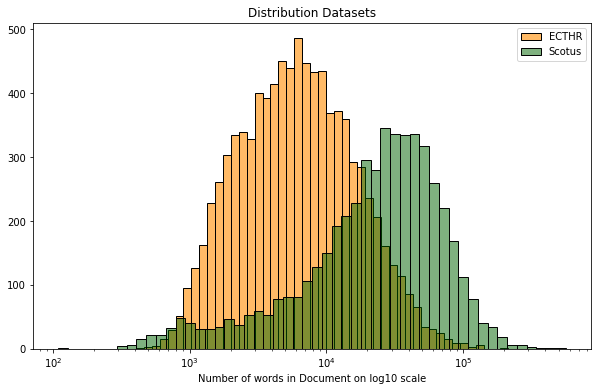

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(10,6))
sns.histplot(x= "length_f",log_scale=True,data = ecthr_train,ax=ax, alpha=.6 ,label = "ECTHR", color="darkorange").set(title='Distribution Datasets')
sns.histplot(x= "length",data = scotus_train,ax=ax, multiple='dodge',alpha=.5, label = 'Scotus',log_scale=True, color="darkgreen")
ax.legend()
ax.set(xlabel='Number of words in Document on log10 scale', ylabel='')
#plt.xlim(0.5, 5.8)
plt.savefig("comparison_length.jpg",dpi=500)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [12]:
import json

In [ ]:
!unzip /content/drive/MyDrive/mimic.jsonl.zip -d content
#with open('content/mimic.jsonl') as f:
#    data = [json.loads(line) for line in f]   

In [14]:
import shutil
shutil.move("content/mimic.jsonl", "IR_LDC/model/MIMIC")

'IR_LDC/model/MIMIC/mimic.jsonl'

In [ ]:
dataset = load_dataset("IR_LDC/model/MIMIC/mimic-dataset.py")

In [17]:
mimic_train=pd.DataFrame(dataset['train'])
text = mimic_train['text']
mimic_train['text'] = pd.Series(mimic_train['text'], dtype="string")
mimic_train['text']= mimic_train['text'].str.split()
mimic_train['length'] = mimic_train['text'].str.len() 

In [ ]:
mimic_train.length.mean()

In [ ]:
mimic_train.length.max()

In [29]:
#!sudo apt update 
#!sudo apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super
#import seaborn as sns
sns.set(font_scale=1.5, rc={'text.usetex' : True})

In [ ]:
scotus_train

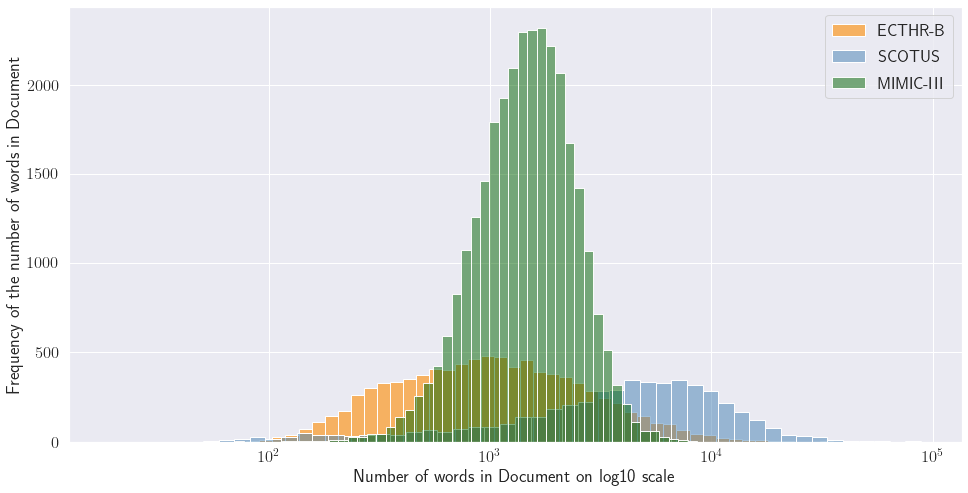

In [31]:
plt.rcParams.update({'font.size': 18})
f, ax = plt.subplots(1, 1, figsize=(16,8))
sns.histplot(x= "length",log_scale=True,data = ecthr_train,ax=ax, alpha=.6 ,label = "ECTHR-B", color="darkorange")#.set(title='Distribution Datasets')
sns.histplot(x= "length",data = scotus_train,ax=ax, multiple='dodge',alpha=.5, label = 'SCOTUS',log_scale=True, color="steelblue")
sns.histplot(x= "length",data = mimic_train,ax=ax, bins=50,multiple='dodge',alpha=.5, label = 'MIMIC-III',log_scale=True, color="darkgreen")
ax.legend()
ax.set(xlabel='Number of words in Document on log10 scale', ylabel='Frequency of the number of words in Document')
#plt.xlim(0.5, 5.8)
plt.savefig("comparison_length.jpg",dpi=500, bbox_inches='tight')

In [ ]:
mimic_train

,summary_id,text,labels,length,text_convert,length_c
0,127292,Admission Date: [**2119-7-11**] ...,"[0, 1, 6, 8, 15]",12048,Admission Date: [**2119-7-11**] ...,12048
1,176337,Admission Date: [**2162-9-30**] Dischar...,"[14, 15, 17]",7022,Admission Date: [**2162-9-30**] Dischar...,7022
2,147893,Admission Date: [**2168-5-22**] ...,"[2, 6]",10959,Admission Date: [**2168-5-22**] ...,10959
3,146781,Admission Date: [**2196-9-18**] ...,"[1, 2, 3, 4, 5, 6, 7, 9, 15]",10346,Admission Date: [**2196-9-18**] ...,10346
4,192989,Admission Date: [**2187-12-6**] ...,"[2, 3, 4, 8, 12]",8342,Admission Date: [**2187-12-6**] ...,8342
...,...,...,...,...,...,...
29995,150830,Admission Date: [**2109-2-22**] Dischar...,"[14, 17]",3211,Admission Date: [**2109-2-22**] Dischar...,3211
29996,161394,Admission Date: [**2107-2-2**] D...,"[1, 3, 4, 6, 8]",11738,Admission Date: [**2107-2-2**] D...,11738
29997,107142,Admission Date: [**2118-11-12**] ...,"[2, 3, 4, 6, 8]",7578,Admission Date: [**2118-11-12**] ...,7578
29998,187917,Admission Date: [**2162-4-6**] D...,"[2, 6, 8]",6401,Admission Date: [**2162-4-6**] D...,6401


# MIMIC label plots

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mimic=dataset
mimic_train = pd.DataFrame(mimic['train'])
mimic_test = pd.DataFrame(mimic['test'])
one_hot = MultiLabelBinarizer()
dtrain = one_hot.fit_transform(mimic_train.labels)
dtest = one_hot.fit_transform(mimic_test.labels)
dtrain=pd.DataFrame(dtrain)
dtest=pd.DataFrame(dtest)

In [ ]:
dtrain.count = dtrain.sum().values
rank = dtrain.count.argsort().argsort() 
dtest.count = dtest.sum().values
rank_t = dtest.count.argsort().argsort()
pal = sns.color_palette("mako", len(dtrain.count)) 

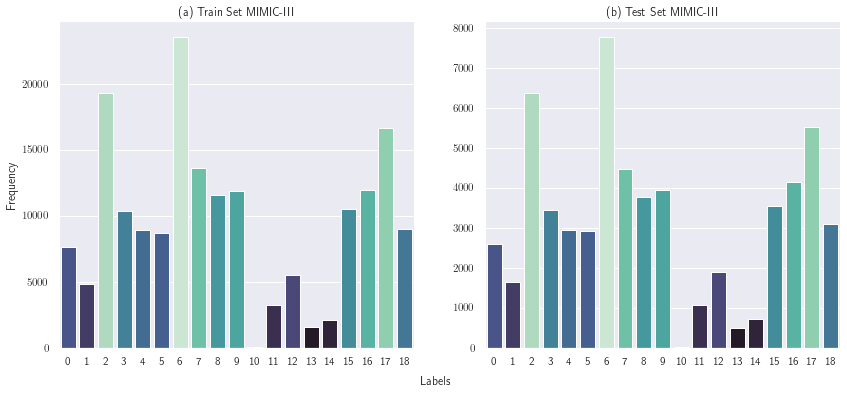

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
plt.rcParams.update({'font.size': 14})
sns.set(font_scale=1, rc={'text.usetex' : True})
fig, ax = plt.subplots(1,2, figsize=(14,6))
categories = list(dtrain.columns.values)
sns.barplot(y=dtrain.sum().values, x = categories, ax=ax[0],palette=np.array(pal[::1])[rank])
sns.barplot(y= dtest.sum().values, x = categories,ax=ax[1],palette=np.array(pal[::1])[rank])
ax[0].set_ylabel('Frequency')
#adding the text labels
fig.text(0.5, 0.04, 'Labels', ha='center')

ax[0].set_title('(a) Train Set MIMIC-III', size=12)
ax[1].set_title('(b) Test Set MIMIC-III', size=12)

for spine in ['top', 'right']:
    ax[0].spines[spine].set_visible(False)


for spine in ['top', 'right']:
    ax[1].spines[spine].set_visible(False)

plt.savefig('mimic_label_split.png', dpi=500, bbox_inches='tight')
plt.show()

# ECTHR Label plot

In [ ]:
ecthr_test = pd.DataFrame(ecthr['test'])

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
one_hot = MultiLabelBinarizer()
dtrain = one_hot.fit_transform(ecthr_train.labels)
dtest = one_hot.fit_transform(ecthr_test.labels)

In [ ]:
dtrain=pd.DataFrame(dtrain)
dtest=pd.DataFrame(dtest)

In [ ]:
dtrain.count = dtrain.sum().values
rank = dtrain.count.argsort().argsort() 
dtest.count = dtest.sum().values
rank_t = dtest.count.argsort().argsort() 

In [ ]:
dtest.count = dtest.sum().values
rank_t = dtest.count.argsort().argsort() 

In [ ]:
type(rank_t)

numpy.ndarray

In [ ]:
#pal = sns.color_palette("coolwarm", len(dtrain.count))

In [ ]:
#pal = sns.color_palette("autumn", len(dtrain.count))

In [ ]:
pal = sns.color_palette("mako", len(dtrain.count))

In [ ]:
dtrain.count= np.sort(dtrain.count)

In [ ]:
dtrain.count

array([  81,  162,  441,  444,  623, 1056, 1558, 1623, 1740, 5437])

In [ ]:
rank_t

array([3, 8, 7, 9, 6, 0, 4, 2, 1, 5])

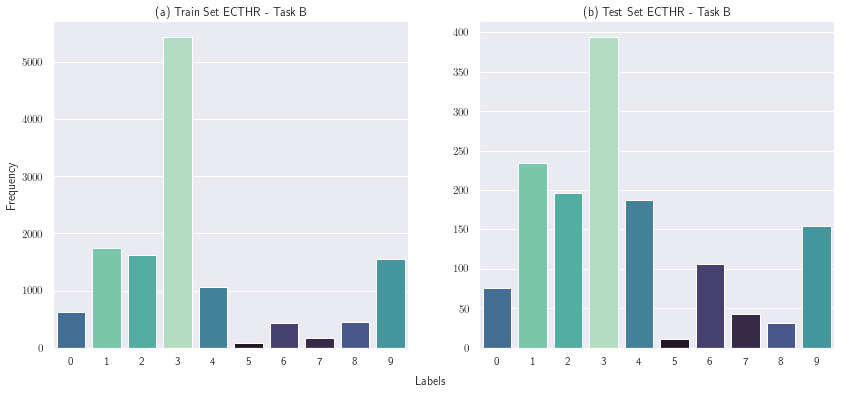

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
plt.rcParams.update({'font.size': 14})
sns.set(font_scale=1, rc={'text.usetex' : True})

fig, ax = plt.subplots(1,2, figsize=(14,6))
categories = list(dtrain.columns.values)
sns.barplot(y=dtrain.sum().values, x = categories, ax=ax[0],palette=np.array(pal[::1])[rank])
sns.barplot(y= dtest.sum().values, x = categories,ax=ax[1],palette=np.array(pal[::1])[rank])
ax[0].set_ylabel('Frequency')
#adding the text labels
fig.text(0.5, 0.04, 'Labels', ha='center')

ax[0].set_title('(a) Train Set ECTHR - Task B', size=12)
ax[1].set_title('(b) Test Set ECTHR - Task B', size=12)

for spine in ['top', 'right']:
    ax[0].spines[spine].set_visible(False)


for spine in ['top', 'right']:
    ax[1].spines[spine].set_visible(False)

plt.savefig('ecthr_performance.png', format="png", dpi=500, bbox_inches='tight')
plt.show()

#SCOTUS Fixed plot 

In [ ]:
scotus = load_dataset('lex_glue','scotus')

Generating train split:   0%|          | 0/5000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1400 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1400 [00:00<?, ? examples/s]

Dataset lex_glue downloaded and prepared to /root/.cache/huggingface/datasets/lex_glue/scotus/1.0.0/8a66420941bf6e77a7ddd4da4d3bfb7ba88ef48c1d55302a568ac650a095ca3a. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
test = pd.DataFrame(scotus['test'])
train = pd.DataFrame(scotus['train'])
train_x = train.groupby('label', as_index=False).count()
test_x = test.groupby('label', as_index=False).count()

In [ ]:
test_x

,label,text
0,0,372
1,1,222
2,2,88
3,3,51
4,4,28
5,5,17
6,6,24
7,7,260
8,8,200
9,9,83


In [ ]:
rank = train_x.sort_values(by='text', ascending=False) 
pal = sns.color_palette("mako", len(train_x))

In [ ]:
rank = train_x.text.rank(method='first')-1
rank=np.array(rank)
rank=rank.astype(int)

In [ ]:
rank_t = test_x.text.rank(method='first')-1
rank_t=np.array(rank_t)
rank_t=rank_t.astype(int)

In [ ]:
#dtrain.count = dtrain.sum().values
#rank = dtrain.count.argsort().argsort() 
#dtest.count = dtest.sum().values
#rank_t = dtest.count.argsort().argsort() 

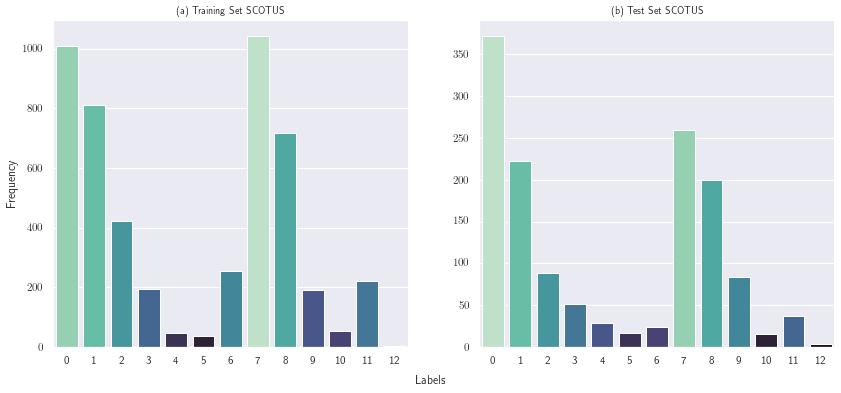

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
#fig.suptitle('Distribution of the Labels in the SCOTUS dataset')

sns.barplot(ax=axes[0], x='label', y='text', data =train_x,palette=np.array(pal[::1])[rank])
axes[0].set_title('(a) Training Set SCOTUS', size=10)

sns.barplot(ax=axes[1], x='label', y='text', data =test_x, palette=np.array(pal[::1])[rank_t])
axes[1].set_title('(b) Test Set SCOTUS', size=10)

axes[0].set_ylabel('Frequency')
axes[1].set_ylabel('')
axes[1].set_xlabel('')
axes[0].set_xlabel('')
fig.text(0.5, 0.04, 'Labels', ha='center')

for spine in ['top', 'right']:
    axes[0].spines[spine].set_visible(False)
for spine in ['top', 'right']:
    axes[1].spines[spine].set_visible(False)

plt.savefig('scotus_label_split.png', format="png",dpi=500, bbox_inches='tight')

In [ ]:
%load_ext tensorboard
%tensorboard --logdir '{model_output_dir}'/runs

In [ ]:
from tensorboard import notebook
notebook.list() # View open TensorBoard instances

In [ ]:
notebook.display(port=6006, height=1000) 